In [196]:
ITERATIONS = 20
TEST_SIZE = 0.3
FEATURES = ['incident_classification', 'alarm_box_borough']
TARGET_ATTRIBUTE = 'engines_assigned_quantity'
SAVE_AS = 'version-01'

In [197]:
import pandas as pd
from pathlib import Path

df = pd.read_csv(f'{Path.cwd()}/../preparedData/incidents.csv')

df = df.sample(n=50000)

df.head()

,alarm_box_location,alarm_box_borough,incident_classification,incident_classification_group,incident_travel_tm_seconds_qy,incident_datetime,engines_assigned_quantity,ladders_assigned_quantity,other_units_assigned_quantity,incident_timestamp,alarm_box_latitude,alarm_box_longtitude,nearest_fire_station_latitude,nearest_fire_station_longitude
1264075,BROADWAY & BERRY ST,BROOKLYN,Odor - Other Smoke,NonMedical Emergencies,165.0,2010-09-03 19:56:01,3.0,2.0,1.0,1.283544e+09,40.710482,-73.965492,40.705312,-73.931932
1304241,103 AVE & 109 ST,QUEENS,Medical - EMS Link 10-91,Medical Emergencies,251.0,2010-11-10 05:07:51,1.0,0.0,0.0,1.289366e+09,40.685568,-73.833422,40.607320,-74.089242
1519652,W 125 ST/KING BD & LENOX AVE/MALCOLM X,MANHATTAN,Medical - EMS Link 10-91,Medical Emergencies,193.0,2011-11-21 15:14:00,1.0,0.0,0.0,1.321888e+09,40.807773,-73.945482,40.693527,-73.806938
1452131,MADISON AVE & E 135 ST,MANHATTAN,Non-Medical MFA - ERS No Contact,NonMedical MFAs,357.0,2011-08-01 00:04:36,1.0,0.0,0.0,1.312157e+09,40.812075,-73.936032,40.721879,-73.982526
161546,NOSTRAND AVE & HANCOCK ST,BROOKLYN,Utility Emergency - Water,NonMedical Emergencies,128.0,2005-01-08 15:40:05,3.0,2.0,1.0,1.105199e+09,40.682537,-73.950008,40.726096,-73.896235


In [198]:
features = df[FEATURES]

text_features = []

for column in features.columns:
  try:
    features[column].astype(float)
  except ValueError:
    text_features.append(column)

print(text_features)

['incident_classification', 'alarm_box_borough']


In [199]:
dummies = pd.get_dummies(features, columns=text_features, dtype=int)

features = pd.concat([features, dummies], axis=1)

features = features.drop(columns=text_features)

features.head()

,incident_classification_Abandoned Derelict Vehicle Fire,incident_classification_Alarm System - Defective,incident_classification_Alarm System - Other,incident_classification_Alarm System - Recorded,incident_classification_Alarm System - Testing,incident_classification_Alarm System - Unnecessary,incident_classification_Alarm System - Unwarranted,incident_classification_Assist Civilian - Non-Medical,incident_classification_Automobile Fire,incident_classification_Brush Fire,...,incident_classification_Utility Emergency - Steam,incident_classification_Utility Emergency - Undefined,incident_classification_Utility Emergency - Water,incident_classification_Vehicle Accident - Other,incident_classification_Vehicle Accident - With Extrication,alarm_box_borough_BRONX,alarm_box_borough_BROOKLYN,alarm_box_borough_MANHATTAN,alarm_box_borough_QUEENS,alarm_box_borough_RICHMOND / STATEN ISLAND
1264075,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1304241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1519652,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1452131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
161546,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [200]:
target = df[TARGET_ATTRIBUTE]

target.head()

1264075    3.0
1304241    1.0
1519652    1.0
1452131    1.0
161546     3.0
Name: engines_assigned_quantity, dtype: float64

In [201]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

models = []
errors = []

for iteration in range(ITERATIONS):
  features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=TEST_SIZE, random_state=iteration) 
  model = LinearRegression()
  model.fit(features_train, target_train)
  target_pred = model.predict(features_test)
  mse = metrics.mean_squared_error(target_test, target_pred)
  models.append(model)
  errors.append(mse)

print('Errors', errors)

Errors [7.11494388298585e+20, 3.1697120472552772e+16, 0.5277904373844464, 1.9280632180974723e+19, 0.5777448836534168, 0.9813774345318166, 1.0888339108061083e+17, 6859731350908077.0, 358240289583737.1, 0.7516454371013368, 4925056593718801.0, 0.5858276158787941, 0.7907808683684716, 1.9757078266313474e+19, 0.5658216290339556, 7227013281342593.0, 0.5676003747599871, 0.5916091480719546, 0.8032562643084055, 0.6828690541400225]


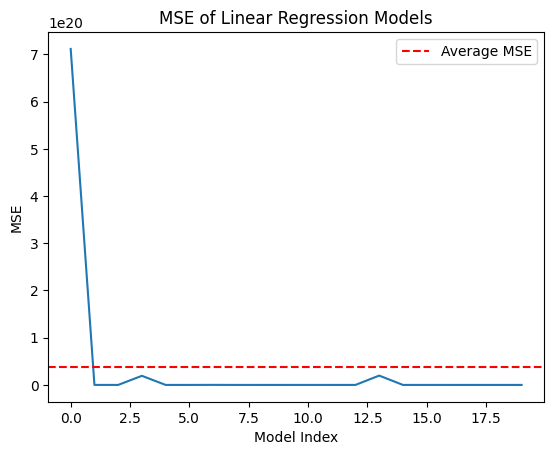

In [202]:
import matplotlib.pyplot as plt
import numpy as np

average_error = np.mean(errors)

plt.plot(errors)
plt.axhline(average_error, color='r', linestyle='--', label='Average MSE')
plt.xlabel('Model Index')
plt.ylabel('MSE')
plt.title('MSE of Linear Regression Models')
plt.legend()
plt.show()

In [203]:
best_model_index = errors.index(min(errors))
best_model = models[best_model_index]

print('Best Model MSE', min(errors))

Best Model MSE 0.5277904373844464


In [204]:
pd.DataFrame(list(zip(best_model.feature_names_in_, best_model.coef_)))

,0,1
0,incident_classification_Abandoned Derelict Veh...,-1.597126e+10
1,incident_classification_Alarm System - Defective,-1.597126e+10
2,incident_classification_Alarm System - Other,-1.597126e+10
3,incident_classification_Alarm System - Recorded,-1.597126e+10
4,incident_classification_Alarm System - Testing,-1.597126e+10
...,...,...
78,alarm_box_borough_BRONX,-4.658371e+11
79,alarm_box_borough_BROOKLYN,-4.658371e+11
80,alarm_box_borough_MANHATTAN,-4.658371e+11
81,alarm_box_borough_QUEENS,-4.658371e+11


In [205]:
import joblib
from pathlib import Path

joblib.dump(best_model, f'{Path.cwd()}/../models/model.pkl')

joblib.dump(FEATURES, f'{Path.cwd()}/../models/features.pkl')
joblib.dump(TARGET_ATTRIBUTE, f'{Path.cwd()}/../models/target.pkl')

['/Users/loic.doerr/dev/ny-emergency-ai/src/../models/target.pkl']